# Connect to G-Drive

In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Change the directory of Google Colab

In [16]:
import os

In [17]:
# file_dir, sesuaikan dengan lokasi dimana kamu tarus file "Homework - DataFrame.xlsx"
file_dir = "/content/drive/MyDrive/Digital Skola/Data Science Homework Answers/DataFrame"
os.chdir(file_dir)

In [18]:
# check file apa saja yang ada di current directory
!ls

'DataFrame II Homework - Answers.ipynb'
'For Tutors'
'Homework - DataFrame.xlsx'
'[Pre-Loaded] DataFrame II Homework.ipynb'


# Import Library

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

## Load "Paid-Transaction" Sheet

In [20]:
# Load the "Paid-Transaction" sheet from thw excel file into a DataFrame, 
# skipping the first row and first column

df_PT = pd.read_excel(  
    io="Homework - DataFrame.xlsx", 
    sheet_name="Paid-Transaction", 
    skiprows=1, 
    usecols=lambda x: x not in [0] # skip columns 0
)
df_PT = df_PT.drop("Unnamed: 0", axis=1)
df_PT["Paid Date"] = df_PT["Paid Date"].astype(str) # ubah type kolom dari int ke str
df_PT.head()

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,"10,200.00",9000,0.00
1,20170701,201707018889790,BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.00,0,0.00
2,20170707,201707079264675,Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.00,0,0.00
3,20170720,201707209945714,Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,"5,900.00",0,0.00
4,20170722,201707220002354,rizal,Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,"5,600.00",0,0.00


In [21]:
df_PT.isnull().sum()

Paid Date             0
Order Number          0
First Name            4
Last Name             4
Meta Category         0
Product Name          0
Transaction Amount    0
Seller Discount       0
Sales Discount        0
Delivery Fee          0
Other Discount        0
dtype: int64

## Load "Confirmed-Transaction" Sheet

In [22]:
# Load the "Confirmed-Transaction" sheet from thw excel file into a DataFrame, 
# skipping the first four rows and first column

df_ConfirmedTrx = pd.read_excel(    
    io="Homework - DataFrame.xlsx", 
    sheet_name="Confirmed-Transaction", 
    skiprows= [0, 1, 2, 3], # or range(4), 
    usecols=lambda x: x not in [0] # skip columns 0
)

df_ConfirmedTrx = df_ConfirmedTrx.drop("Unnamed: 0", axis=1)
df_ConfirmedTrx.head()

,Order Number,Purchase Confirmation Date
0,201707240088517,20170727
1,201707018889790,20170701
2,201707079264675,20170707
3,201707209945714,20170722
4,201707220002354,20170802


In [23]:
df_ConfirmedTrx.isnull().sum()

Order Number                  0
Purchase Confirmation Date    0
dtype: int64

## Load "Cancelled-Transaction" Sheet

In [24]:
# Load the "Cancelled-Transaction" sheet from thw excel file into a DataFrame, 
# skipping the first four rows and first column

df_CancelledTrx = pd.read_excel(    
    io="Homework - DataFrame.xlsx", 
    sheet_name="Cancelled-Transaction", 
    skiprows=1, 
    usecols=lambda x: x not in [0] # skip columns 0
)

df_CancelledTrx = df_CancelledTrx.drop("Unnamed: 0", axis=1)
df_CancelledTrx.head()

,Order Number,Cancel Stakeholder,Cancel Reason
0,201708070642912,System,No response from seller
1,201708150868462,Seller,Sold out
2,201712092803286,System,No response from seller
3,201708020451422,Seller,Incorrect price information
4,201707179812794,System,No response from seller


In [25]:
df_CancelledTrx.isnull().sum()

Order Number          0
Cancel Stakeholder    0
Cancel Reason         0
dtype: int64

## Load "Transaction Fee" Sheet

In [26]:
# Load the "Transaction Fee" sheet from thw excel file into a DataFrame, 
# skipping the first four rows and first column
# TF: Transaction Fee

df_TF = pd.read_excel(    
    io="Homework - DataFrame.xlsx", 
    sheet_name="Transaction Fee", 
    skiprows= [0, 1, 2, 3], # or range(4), 
    usecols=lambda x: x not in [0] # skip columns 0
)
df_TF = df_TF.drop("Unnamed: 0", axis=1)
df_TF["Month"] = df_TF["Month"].astype(str) # ubah type kolom dari int ke str
df_TF.head()

,Month,Meta Category,Transaction Fee Rate
0,201707,Home/ Food,0.07
1,201707,Gadget/ Komputer,0.03
2,201707,Fashion,0.09
3,201707,Babies/ Kids,0.03
4,201707,Beauty/ Health,0.08


In [27]:
df_TF.isnull().sum()

Month                   0
Meta Category           0
Transaction Fee Rate    0
dtype: int64

## Load "Seller" Sheet

In [28]:
# Load the "Seller" sheet from thw excel file into a DataFrame, 
# skipping the first row and first column
df_Seller = pd.read_excel(  
    io="Homework - DataFrame.xlsx", 
    sheet_name="Seller", 
    skiprows=1, 
    usecols=lambda x: x not in [0] # skip columns 0
)

df_Seller = df_Seller.drop("Unnamed: 0", axis=1)
df_Seller.head()

,Order Number,Seller
0,201707209929420,Global Phone
1,201707129550097,E-shop
2,201707039056021,twelven com
3,201707099376522,GRAMEDIA
4,201707028956707,E-Bold


In [29]:
df_Seller.isnull().sum()

Order Number    0
Seller          0
dtype: int64

## Merge All Loaded Sheets

In [30]:
# Merge PT & ConfirmedTrx
df_PT = df_PT.merge(
    right=df_ConfirmedTrx, 
    how="left", 
    on=["Order Number"],
    suffixes=("", "_ConfTrx")
)

# Merge PT & CancelledTrx
df_PT = df_PT.merge(
    right=df_CancelledTrx, 
    how="left", 
    on=["Order Number"],
    suffixes=("", "_CancTrx")
)

# Merge PT & Seller
df_PT = df_PT.merge(
    right=df_Seller, 
    how="left", 
    on=["Order Number"],
    suffixes=("", "_Seller")
)

# Tambah satu kolom "Month" ke df_PT
# .str untuk treat every row in the series like a string object
# [:6] ambil 5 huruf pertama
df_PT["Month"] = df_PT["Paid Date"].str[:6] 

# Merge PT & TF
df_PT = df_PT.merge(
    right=df_TF, 
    how="left", 
    on=["Month", "Meta Category"],
    suffixes=("", "_TF")
)

In [31]:
df_PT.isnull().sum()

Paid Date                         0
Order Number                      0
First Name                        4
Last Name                         4
Meta Category                     0
Product Name                      0
Transaction Amount                0
Seller Discount                   0
Sales Discount                    0
Delivery Fee                      0
Other Discount                    0
Purchase Confirmation Date      974
Cancel Stakeholder            11026
Cancel Reason                 11026
Seller                            0
Month                             0
Transaction Fee Rate              0
dtype: int64

In [32]:
df_PT["Purchase Confirmation Date"] = df_PT["Purchase Confirmation Date"].astype(str)

# Hati-hati disini!, yang tadinya NaN menjadi string "nan", seakan-akan bukan null/kosong
df_PT[df_PT["Purchase Confirmation Date"].isnull()]

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate


In [33]:
df_PT.info() # lihat nomor 11!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Paid Date                   12000 non-null  object 
 1   Order Number                12000 non-null  int64  
 2   First Name                  11996 non-null  object 
 3   Last Name                   11996 non-null  object 
 4   Meta Category               12000 non-null  object 
 5   Product Name                12000 non-null  object 
 6   Transaction Amount          12000 non-null  int64  
 7   Seller Discount             12000 non-null  int64  
 8   Sales Discount              12000 non-null  float64
 9   Delivery Fee                12000 non-null  int64  
 10  Other Discount              12000 non-null  float64
 11  Purchase Confirmation Date  12000 non-null  object 
 12  Cancel Stakeholder          974 non-null    object 
 13  Cancel Reason               974

# Q1. Answer and The Process

In Paid-Transaction sheet, Insert column after Last Name, name the new column as Full Name.

In [34]:
df_PT.head()

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate
0,20170724,201707240088517,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,"10,200.00",9000,0.00,20170727.0,NaN,NaN,Babymaniashop,201707,0.03
1,20170701,201707018889790,BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.00,0,0.00,20170701.0,NaN,NaN,E-Bold,201707,0.01
2,20170707,201707079264675,Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.00,0,0.00,20170707.0,NaN,NaN,XLmystore,201707,0.01
3,20170720,201707209945714,Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,"5,900.00",0,0.00,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09
4,20170722,201707220002354,rizal,Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,"5,600.00",0,0.00,20170802.0,NaN,NaN,Media Gadget,201707,0.03


## Check Missing Values

In [35]:
df_PT.isnull().sum()

Paid Date                         0
Order Number                      0
First Name                        4
Last Name                         4
Meta Category                     0
Product Name                      0
Transaction Amount                0
Seller Discount                   0
Sales Discount                    0
Delivery Fee                      0
Other Discount                    0
Purchase Confirmation Date        0
Cancel Stakeholder            11026
Cancel Reason                 11026
Seller                            0
Month                             0
Transaction Fee Rate              0
dtype: int64

In [36]:
# Find missing values in df["First Name"] & df["Last Name"]
null_first_name = df_PT["First Name"].isnull()
null_last_name = df_PT["Last Name"].isnull()

## Impute Missing Values

### Both null

In [37]:
df_PT.loc[null_first_name & null_last_name, :]
# Tidak ada

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate


In [38]:
# Jika ada, delete baris tersebut
# df.drop(labels={insert index number(s) here}, axis=0)

### One of them is null

In [39]:
# Baris yang first name atau last name nya bernilai null
df_PT.loc[null_first_name | null_last_name, :]
# Found some rows!

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate
2670,20170824,201708241089263,heri,NaN,Service/ Mokado,Pulsa Indosat 200.000,160000,0,"11,200.00",0,0.00,20170824.0,NaN,NaN,MOBILEPULSA APP,201708,0.01
5974,20170930,201709301838869,NaN,ONNIE,Beauty/ Health,[Bali Ratih] Paket 2pcs Body Mist,45000,19500,"1,250.00",9000,0.00,20171005.0,NaN,NaN,debalisale,201709,0.09
7771,20171130,201711302692735,NaN,Rudy,Fashion,ANGEL WINGS BRA / Push Up braa tali ikat / sex...,10600,0,0.00,0,0.00,20171206.0,NaN,NaN,csshopsby_collection,201711,0.09
8397,20171028,201710282239617,Intan,NaN,Service/ Mokado,TRI three Paket Data Mini Kuota 3GB Semua Jari...,55800,0,"3,900.00",0,0.00,20171028.0,NaN,NaN,LeeShop21,201710,0.01
8770,20171126,201711262635186,Mardinata,NaN,Service/ Mokado,Telkomsel Data 100.000,170000,2000,0.00,0,0.00,20171126.0,NaN,NaN,MOBILEPULSA APP,201711,0.01
9656,20171203,201712032722570,Tutik,NaN,Service/ Mokado,Pulsa Three 30.000,103200,0,"4,100.00",0,0.00,20171203.0,NaN,NaN,MOBILEPULSA APP,201712,0.01
9689,20171103,201710312275649,NaN,Teresia,Sports/ Hobi/ Otomotif,3M Car Freshener Pengharum Ruangan Mobil Aroma...,103200,0,"5,200.00",0,0.00,nan,Seller,No response from seller,TIGAEM.COM,201711,0.05
10288,20171210,201712102820392,NaN,Nathalia,Service/ Mokado,"PLN 200000 (Masukan 11 digit nomor meter, buka...",8500,2800,300.00,0,0.00,20171211.0,NaN,NaN,MOBILEPULSA APP,201712,0.01


### Imputing null values with a plan

In [40]:
# Jika  First Name yang kosong, isi dengan Last Name nya
df_PT["First Name"] = df_PT["First Name"].fillna(df_PT["Last Name"])

# Kemudian bisa kita isi df["Last Name"] dengan " " (spasi), untuk: 
# 1. yang sudah dipindah ke df["First Name"] (yang tadinya df["First Name"] nya null )
# 2. maupun yang memang dari awal sudah null
df_PT.loc[null_first_name | null_last_name, "Last Name"] = " "

In [41]:
# Check apakah sudah sesuai dengan yang diinginkan]
df_PT.loc[null_first_name | null_last_name]

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate
2670,20170824,201708241089263,heri,,Service/ Mokado,Pulsa Indosat 200.000,160000,0,"11,200.00",0,0.00,20170824.0,NaN,NaN,MOBILEPULSA APP,201708,0.01
5974,20170930,201709301838869,ONNIE,,Beauty/ Health,[Bali Ratih] Paket 2pcs Body Mist,45000,19500,"1,250.00",9000,0.00,20171005.0,NaN,NaN,debalisale,201709,0.09
7771,20171130,201711302692735,Rudy,,Fashion,ANGEL WINGS BRA / Push Up braa tali ikat / sex...,10600,0,0.00,0,0.00,20171206.0,NaN,NaN,csshopsby_collection,201711,0.09
8397,20171028,201710282239617,Intan,,Service/ Mokado,TRI three Paket Data Mini Kuota 3GB Semua Jari...,55800,0,"3,900.00",0,0.00,20171028.0,NaN,NaN,LeeShop21,201710,0.01
8770,20171126,201711262635186,Mardinata,,Service/ Mokado,Telkomsel Data 100.000,170000,2000,0.00,0,0.00,20171126.0,NaN,NaN,MOBILEPULSA APP,201711,0.01
9656,20171203,201712032722570,Tutik,,Service/ Mokado,Pulsa Three 30.000,103200,0,"4,100.00",0,0.00,20171203.0,NaN,NaN,MOBILEPULSA APP,201712,0.01
9689,20171103,201710312275649,Teresia,,Sports/ Hobi/ Otomotif,3M Car Freshener Pengharum Ruangan Mobil Aroma...,103200,0,"5,200.00",0,0.00,nan,Seller,No response from seller,TIGAEM.COM,201711,0.05
10288,20171210,201712102820392,Nathalia,,Service/ Mokado,"PLN 200000 (Masukan 11 digit nomor meter, buka...",8500,2800,300.00,0,0.00,20171211.0,NaN,NaN,MOBILEPULSA APP,201712,0.01


In [42]:
df_PT.isna().sum()

Paid Date                         0
Order Number                      0
First Name                        0
Last Name                         0
Meta Category                     0
Product Name                      0
Transaction Amount                0
Seller Discount                   0
Sales Discount                    0
Delivery Fee                      0
Other Discount                    0
Purchase Confirmation Date        0
Cancel Stakeholder            11026
Cancel Reason                 11026
Seller                            0
Month                             0
Transaction Fee Rate              0
dtype: int64

## Create "Full Name"

In [43]:
full_name = df_PT["First Name"].str.capitalize() + " . " + df_PT["Last Name"].str.capitalize().str[0]
df_PT.insert(
    loc=4,
    column="Full Name",
    value=full_name
)

In [44]:
df_PT.loc[df_PT["Last Name"] == " ", :]

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate
2670,20170824,201708241089263,heri,,Heri .,Service/ Mokado,Pulsa Indosat 200.000,160000,0,"11,200.00",0,0.00,20170824.0,NaN,NaN,MOBILEPULSA APP,201708,0.01
5974,20170930,201709301838869,ONNIE,,Onnie .,Beauty/ Health,[Bali Ratih] Paket 2pcs Body Mist,45000,19500,"1,250.00",9000,0.00,20171005.0,NaN,NaN,debalisale,201709,0.09
7771,20171130,201711302692735,Rudy,,Rudy .,Fashion,ANGEL WINGS BRA / Push Up braa tali ikat / sex...,10600,0,0.00,0,0.00,20171206.0,NaN,NaN,csshopsby_collection,201711,0.09
8397,20171028,201710282239617,Intan,,Intan .,Service/ Mokado,TRI three Paket Data Mini Kuota 3GB Semua Jari...,55800,0,"3,900.00",0,0.00,20171028.0,NaN,NaN,LeeShop21,201710,0.01
8770,20171126,201711262635186,Mardinata,,Mardinata .,Service/ Mokado,Telkomsel Data 100.000,170000,2000,0.00,0,0.00,20171126.0,NaN,NaN,MOBILEPULSA APP,201711,0.01
9656,20171203,201712032722570,Tutik,,Tutik .,Service/ Mokado,Pulsa Three 30.000,103200,0,"4,100.00",0,0.00,20171203.0,NaN,NaN,MOBILEPULSA APP,201712,0.01
9689,20171103,201710312275649,Teresia,,Teresia .,Sports/ Hobi/ Otomotif,3M Car Freshener Pengharum Ruangan Mobil Aroma...,103200,0,"5,200.00",0,0.00,nan,Seller,No response from seller,TIGAEM.COM,201711,0.05
10288,20171210,201712102820392,Nathalia,,Nathalia .,Service/ Mokado,"PLN 200000 (Masukan 11 digit nomor meter, buka...",8500,2800,300.00,0,0.00,20171211.0,NaN,NaN,MOBILEPULSA APP,201712,0.01


In [45]:
df_PT.head()

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate
0,20170724,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,"10,200.00",9000,0.00,20170727.0,NaN,NaN,Babymaniashop,201707,0.03
1,20170701,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.00,0,0.00,20170701.0,NaN,NaN,E-Bold,201707,0.01
2,20170707,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.00,0,0.00,20170707.0,NaN,NaN,XLmystore,201707,0.01
3,20170720,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,"5,900.00",0,0.00,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09
4,20170722,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,"5,600.00",0,0.00,20170802.0,NaN,NaN,Media Gadget,201707,0.03


# Q2. Answer and The Process

In [46]:
# Alasan mengubah "Paid Date", "Purchase Confirmation Date", yang tadinya "int"/"float" menjadi "str"
# adalah krn kita akan menggunakan pd.to_datetime, dimana inputnya adalah pd.Series yang bertype "str"
# dan agar mudah diubah menjadi timestamp dalam format apapun

See docs here: 
1. [doc1](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) 
2. [doc2](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
3. [StackOverflow link](https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas)

## Paid Date 2

In [47]:
paid_date_2 = pd.to_datetime(df_PT["Paid Date"]).dt.strftime('%d-%b-%y')
paid_date_2

0        24-Jul-17
1        01-Jul-17
2        07-Jul-17
3        20-Jul-17
4        22-Jul-17
           ...    
11995    01-Dec-17
11996    03-Dec-17
11997    04-Dec-17
11998    07-Dec-17
11999    05-Dec-17
Name: Paid Date, Length: 12000, dtype: object

## Paid Day

In [48]:
paid_day = pd.to_datetime(df_PT["Paid Date"]).dt.strftime('%a')
paid_day

0        Mon
1        Sat
2        Fri
3        Thu
4        Sat
        ... 
11995    Fri
11996    Sun
11997    Mon
11998    Thu
11999    Tue
Name: Paid Date, Length: 12000, dtype: object

## Insert "Paid Date 2" & "Paid Day"

In [49]:
df_PT.insert(
    loc=1,
    column="Paid Date 2",
    value=paid_date_2
)

df_PT.insert(
    loc=2,
    column="Paid Day",
    value=paid_day
)

df_PT.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,"10,200.00",9000,0.00,20170727.0,NaN,NaN,Babymaniashop,201707,0.03
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.00,0,0.00,20170701.0,NaN,NaN,E-Bold,201707,0.01
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.00,0,0.00,20170707.0,NaN,NaN,XLmystore,201707,0.01
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,"5,900.00",0,0.00,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,"5,600.00",0,0.00,20170802.0,NaN,NaN,Media Gadget,201707,0.03


# Q3. Answer and The Process

In Paid-Transaction sheet, Insert column after Seller Discount, name the new column as GMV				
Fill in GMV based on the following Business Rules				
				
GMV is Gross Merchandise Value				
GMV contains of Transaction amount substracts Seller Discount but includes Delivery Fee				

## Define GMV Values as Business Rules

In [50]:
gmv_values = df_PT["Transaction Amount"] - df_PT["Seller Discount"] + df_PT["Delivery Fee"]

## Insert "GMV"

In [51]:
col_list = df_PT.columns.to_list()
col_list.index("Seller Discount") # Posisi kolom "Seller Discount"

10

In [52]:
df_PT.insert(
    loc=col_list.index("Seller Discount") + 1,
    column="GMV",
    value=gmv_values
)

df_PT.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,GMV,Sales Discount,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,156000,"10,200.00",9000,0.00,20170727.0,NaN,NaN,Babymaniashop,201707,0.03
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,...,219800,0.00,0,0.00,20170701.0,NaN,NaN,E-Bold,201707,0.01
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,...,35000,700.00,0,0.00,20170707.0,NaN,NaN,XLmystore,201707,0.01
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,...,85000,"5,900.00",0,0.00,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,...,81000,"5,600.00",0,0.00,20170802.0,NaN,NaN,Media Gadget,201707,0.03


# Q4. Answer and The Process

In Paid-Transaction sheet, insert column 'Net Revenue'								
Calculate Net Revenue for each transaction:								
Net Revenue = Transaction Fee Amount - Sales Discount - Other Discount							
								
Transaction Fee reference is available on separate sheet.								

## Calculate "Net Revenue"

Net Revenue = Transaction Fee Amount - Sales Discount - Other Discount

In [53]:
df_PT.columns

Index(['Paid Date', 'Paid Date 2', 'Paid Day', 'Order Number', 'First Name',
       'Last Name', 'Full Name', 'Meta Category', 'Product Name',
       'Transaction Amount', 'Seller Discount', 'GMV', 'Sales Discount',
       'Delivery Fee', 'Other Discount', 'Purchase Confirmation Date',
       'Cancel Stakeholder', 'Cancel Reason', 'Seller', 'Month',
       'Transaction Fee Rate'],
      dtype='object')

In [54]:
# Calculate "Transaction Fee Amount"
df_PT["Transaction Fee Amount"] = df_PT["Transaction Amount"] * df_PT["Transaction Fee Rate"]

In [55]:
df_PT["Net Revenue"] = df_PT["Transaction Fee Amount"] - df_PT["Sales Discount"] - df_PT["Other Discount"]

In [56]:
df_PT.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Delivery Fee,Other Discount,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,9000,0.00,20170727.0,NaN,NaN,Babymaniashop,201707,0.03,"10,200.00",0.00
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,...,0,0.00,20170701.0,NaN,NaN,E-Bold,201707,0.01,"2,878.00","2,878.00"
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,...,0,0.00,20170707.0,NaN,NaN,XLmystore,201707,0.01,350.00,-350.00
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,...,0,0.00,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09,"7,650.00","1,750.00"
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,...,0,0.00,20170802.0,NaN,NaN,Media Gadget,201707,0.03,"2,430.00","-3,170.00"


# Q5. Answer and The Process

Add new sheet, name it Question5. Add ONE chart		
On primary axis, show monthly GMV figures using bar chart.		
On secondary axis, plot monthly %Net Revenue as line chart.		
%Net Revenue = Net Revenue / GMV		
		
Did we do well in December 2017?		

In [57]:
df_PT.columns

Index(['Paid Date', 'Paid Date 2', 'Paid Day', 'Order Number', 'First Name',
       'Last Name', 'Full Name', 'Meta Category', 'Product Name',
       'Transaction Amount', 'Seller Discount', 'GMV', 'Sales Discount',
       'Delivery Fee', 'Other Discount', 'Purchase Confirmation Date',
       'Cancel Stakeholder', 'Cancel Reason', 'Seller', 'Month',
       'Transaction Fee Rate', 'Transaction Fee Amount', 'Net Revenue'],
      dtype='object')

## Calculate "%Net Revenue" on monthly aggregate

In [58]:
df_PT["Cancel Reason"].isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
11995    True
11996    True
11997    True
11998    True
11999    True
Name: Cancel Reason, Length: 12000, dtype: bool

In [59]:
# trx yg terkonfirmasi adlh dimana nilai dari df_PT["Cancel Reason"] = null/kosong
# JANGAN gunakan df_PT["Purchase Confirmation Date"] !!

confirmed_trx_mask = df_PT["Cancel Reason"].isnull()

df_agg = df_PT[confirmed_trx_mask].groupby("Month").sum()[["GMV", "Net Revenue"]]
df_agg

<ipython-input-59-8f2a38262133>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df_PT[confirmed_trx_mask].groupby("Month").sum()[["GMV", "Net Revenue"]]


,GMV,Net Revenue
Month,,
201707,320193900,"735,002.38"
201708,428636100,"-9,362,030.58"
201709,414978800,"3,746,004.37"
201710,242681800,"-615,943.05"
201711,545448900,"-1,652,814.39"
201712,519997700,"-3,694,756.01"


In [60]:
df_agg["%Net Revenue"] = df_agg["Net Revenue"] / df_agg["GMV"] * 100
df_agg

,GMV,Net Revenue,%Net Revenue
Month,,,
201707,320193900,"735,002.38",0.23
201708,428636100,"-9,362,030.58",-2.18
201709,414978800,"3,746,004.37",0.90
201710,242681800,"-615,943.05",-0.25
201711,545448900,"-1,652,814.39",-0.30
201712,519997700,"-3,694,756.01",-0.71


## Change index into month-Year format

In [61]:
df_agg.index = pd.to_datetime(df_agg.index, format="%Y%m").strftime("%b-%Y")
df_agg

,GMV,Net Revenue,%Net Revenue
Month,,,
Jul-2017,320193900,"735,002.38",0.23
Aug-2017,428636100,"-9,362,030.58",-2.18
Sep-2017,414978800,"3,746,004.37",0.90
Oct-2017,242681800,"-615,943.05",-0.25
Nov-2017,545448900,"-1,652,814.39",-0.30
Dec-2017,519997700,"-3,694,756.01",-0.71


## Plotting
1. month-Year(x) vs. Monthly "%Net Revenue" (y1) as line chart
2. month-Year(x) vs. Monthly "GMV" (y2) as bar chart

In [62]:
x = df_agg.index
y1 = df_agg["%Net Revenue"] 
y2 = df_agg["GMV"]

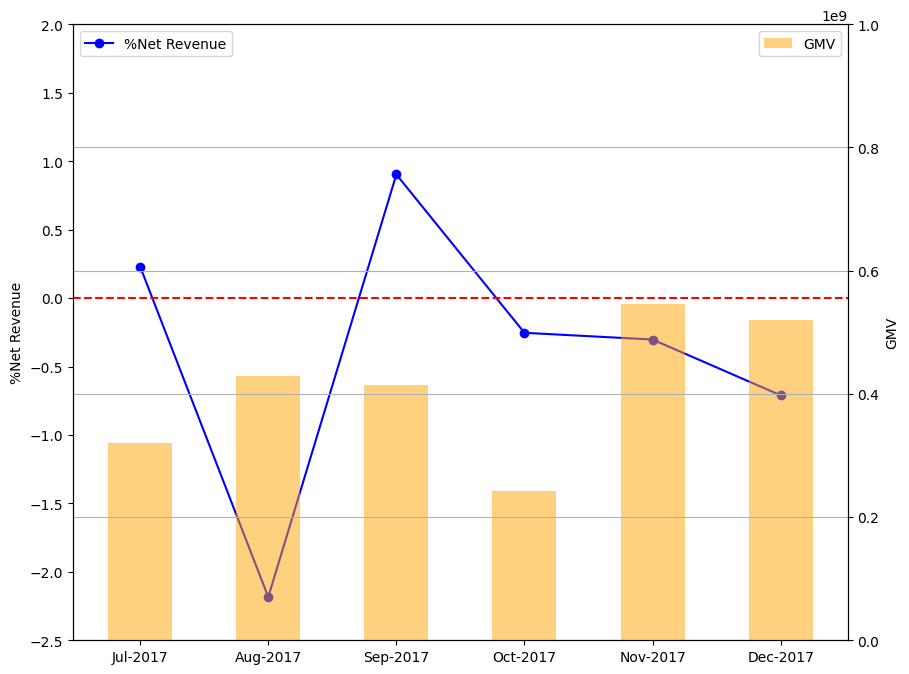

In [63]:
# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(10,8))

# plot line chart on axis #1
ax1.plot(x, y1, "-bo") 
ax1.set_ylabel("%Net Revenue")
ax1.set_ylim(-2.5, 2) # Sesuaikan dengan skala nilai "%Net Revenue"
ax1.axhline(y=0, color="r", linestyle="--")
ax1.legend(["%Net Revenue"], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.bar(x, y2, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel("GMV")
ax2.set_ylim(0, 1e9) # Sesuaikan dengan skala nilai "GMV"
ax2.legend(["GMV"], loc="upper right")

plt.grid()
plt.show()

## Answers to the main question

Did we do well in December 2017?

- Walaupun GMV terbilang tinggi dari bulan-bulan sebelumnya
- namun "%Net Revenue" masih negative dan dalam tren penurunan!

# Q6. Answer and The Process

In a new sheet (Name Question6), create a pivot table, do this grouping:						
						
1. Group 1:					
- Home/ Food						
- Sports/ Hobi/ Otomotif			
- Fashion					
- Beauty/ Health		

2. Group 2:					
- Gadget/ Komputer					
- Elektronik					
- Service/ Mokado					
- Babies/ Kids
						
            
Show monthly %Net Revenue for each group. In December 2017, how do these two groups compare? (Put your answer in sheet Question6)						

## Define Group Map

In [64]:
group_map = {
    # Group 1
    "Home/ Food": "Group 1",
    "Sports/ Hobi/ Otomotif": "Group 1",
    "Fashion": "Group 1",
    "Beauty/ Health": "Group 1",
    # Group 2
    "Gadget/ Komputer": "Group 2",
    "Elektronik": "Group 2",
    "Service/ Mokado": "Group 2",
    "Babies/ Kids": "Group 2"
} 

## Create "Meta Category Group" column

In [65]:
df_PT["Meta Category Group"] = df_PT["Meta Category"].map(group_map)

## Add "Month-Year"

In [66]:
df_PT["Month"]

0        201707
1        201707
2        201707
3        201707
4        201707
          ...  
11995    201712
11996    201712
11997    201712
11998    201712
11999    201712
Name: Month, Length: 12000, dtype: object

In [67]:
pd.to_datetime(df_PT["Month"], format="%Y%m").dt.strftime("%b-%Y")

0        Jul-2017
1        Jul-2017
2        Jul-2017
3        Jul-2017
4        Jul-2017
           ...   
11995    Dec-2017
11996    Dec-2017
11997    Dec-2017
11998    Dec-2017
11999    Dec-2017
Name: Month, Length: 12000, dtype: object

In [68]:
df_PT["Month-Year"] = pd.to_datetime(df_PT["Month"], format="%Y%m").dt.strftime("%b-%Y")
df_PT.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Meta Category Group,Month-Year
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,20170727.0,NaN,NaN,Babymaniashop,201707,0.03,"10,200.00",0.00,Group 2,Jul-2017
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,...,20170701.0,NaN,NaN,E-Bold,201707,0.01,"2,878.00","2,878.00",Group 2,Jul-2017
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,...,20170707.0,NaN,NaN,XLmystore,201707,0.01,350.00,-350.00,Group 2,Jul-2017
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,...,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09,"7,650.00","1,750.00",Group 1,Jul-2017
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,...,20170802.0,NaN,NaN,Media Gadget,201707,0.03,"2,430.00","-3,170.00",Group 2,Jul-2017


## Calculate "%Net Revenue" on "Month-Year" and "Meta Category Group" aggregate

In [69]:
df_group = df_PT[confirmed_trx_mask].groupby(["Month-Year", "Meta Category Group"]).sum()[["GMV", "Net Revenue"]]
df_group

<ipython-input-69-c8fb2e7daf3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df_PT[confirmed_trx_mask].groupby(["Month-Year", "Meta Category Group"]).sum()[["GMV", "Net Revenue"]]


GMV    Net Revenue
Month-Year Meta Category Group                          
Aug-2017   Group 1               85152400   4,809,934.82
           Group 2              343483700 -14,171,965.40
Dec-2017   Group 1              100357900   5,378,800.39
           Group 2              419639800  -9,073,556.40
Jul-2017   Group 1               97197600   5,879,915.93
           Group 2              222996300  -5,144,913.55
Nov-2017   Group 1              234887400   9,295,631.17
           Group 2              310561500 -10,948,445.56
Oct-2017   Group 1              103314200   3,902,821.60
           Group 2              139367600  -4,518,764.65
Sep-2017   Group 1              252533600  10,019,378.78
           Group 2              162445200  -6,273,374.40

In [70]:
df_group["%Net Revenue"] = (df_group["Net Revenue"] / df_group["GMV"]) *100
df_group

GMV    Net Revenue  %Net Revenue
Month-Year Meta Category Group                                        
Aug-2017   Group 1               85152400   4,809,934.82          5.65
           Group 2              343483700 -14,171,965.40         -4.13
Dec-2017   Group 1              100357900   5,378,800.39          5.36
           Group 2              419639800  -9,073,556.40         -2.16
Jul-2017   Group 1               97197600   5,879,915.93          6.05
           Group 2              222996300  -5,144,913.55         -2.31
Nov-2017   Group 1              234887400   9,295,631.17          3.96
           Group 2              310561500 -10,948,445.56         -3.53
Oct-2017   Group 1              103314200   3,902,821.60          3.78
           Group 2              139367600  -4,518,764.65         -3.24
Sep-2017   Group 1              252533600  10,019,378.78          3.97
           Group 2              162445200  -6,273,374.40         -3.86

## Plotting
1. month-Year(x) vs. Group 1 "%Net Revenue" (y1) 
2. month-Year(x) vs. Group 2 "%Net Revenue" (y2) 

In [71]:
df_group = df_group.reset_index()
df_group

,Month-Year,Meta Category Group,GMV,Net Revenue,%Net Revenue
0,Aug-2017,Group 1,85152400,"4,809,934.82",5.65
1,Aug-2017,Group 2,343483700,"-14,171,965.40",-4.13
2,Dec-2017,Group 1,100357900,"5,378,800.39",5.36
3,Dec-2017,Group 2,419639800,"-9,073,556.40",-2.16
4,Jul-2017,Group 1,97197600,"5,879,915.93",6.05
5,Jul-2017,Group 2,222996300,"-5,144,913.55",-2.31
6,Nov-2017,Group 1,234887400,"9,295,631.17",3.96
7,Nov-2017,Group 2,310561500,"-10,948,445.56",-3.53
8,Oct-2017,Group 1,103314200,"3,902,821.60",3.78
9,Oct-2017,Group 2,139367600,"-4,518,764.65",-3.24


In [72]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month-Year           12 non-null     object 
 1   Meta Category Group  12 non-null     object 
 2   GMV                  12 non-null     int64  
 3   Net Revenue          12 non-null     float64
 4   %Net Revenue         12 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 608.0+ bytes


In [73]:
unique_month_year = pd.to_datetime(df_group["Month-Year"]).sort_values().unique()
month_order = pd.Series(unique_month_year).dt.strftime("%b-%Y").to_list()
month_order

['Jul-2017', 'Aug-2017', 'Sep-2017', 'Oct-2017', 'Nov-2017', 'Dec-2017']

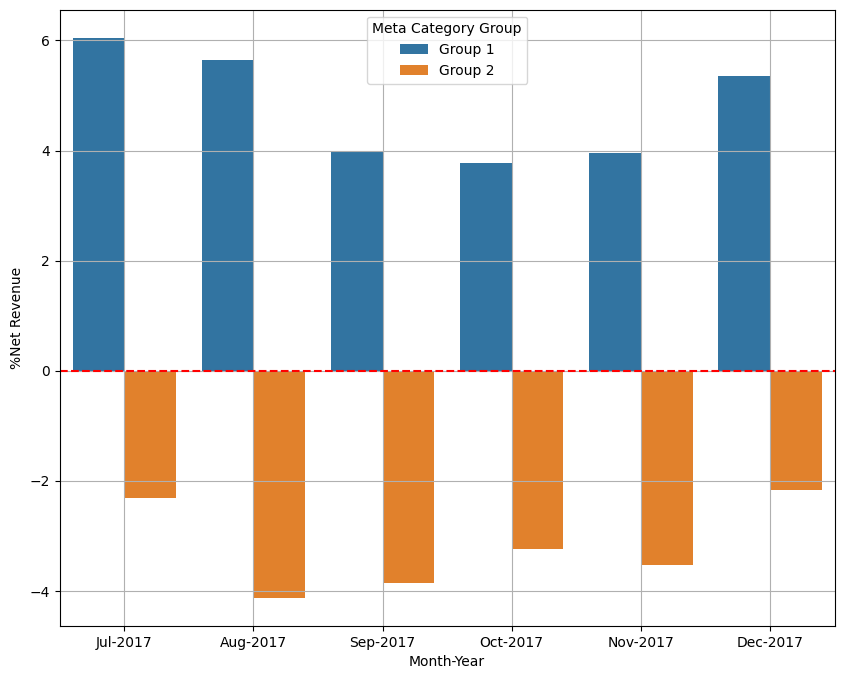

In [74]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_group, 
    x="Month-Year", 
    y="%Net Revenue", 
    hue="Meta Category Group",
    order=month_order,
)
plt.axhline(y=0, color="r", linestyle="--")
plt.legend(loc="upper center", title="Meta Category Group")
plt.grid();

## Answers to the main question

Show monthly %Net Revenue for each group. In December 2017, how do these two groups compare? 

- Dilihat dari plot, jelas bahwa Group 1 memberikan %Net Revenue yang POSITIVE untuk tiap bulannya.

- Sebaliknya, Group 2 memberikan %Net Revenue yang NEGATIVE untuk tiap bulannya.

# Q7. Answer and The Process

1. Which Seller generated highest GMV in August 2017?							
				
2. In Meta Category 'Fashion', which Seller had highest number of transaction in September 2017?

In [75]:
df_PT.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Meta Category Group,Month-Year
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,20170727.0,NaN,NaN,Babymaniashop,201707,0.03,"10,200.00",0.00,Group 2,Jul-2017
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,...,20170701.0,NaN,NaN,E-Bold,201707,0.01,"2,878.00","2,878.00",Group 2,Jul-2017
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,...,20170707.0,NaN,NaN,XLmystore,201707,0.01,350.00,-350.00,Group 2,Jul-2017
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,...,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09,"7,650.00","1,750.00",Group 1,Jul-2017
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,...,20170802.0,NaN,NaN,Media Gadget,201707,0.03,"2,430.00","-3,170.00",Group 2,Jul-2017


## Seller who generated highest GMV in August 2017

[See here!](https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe)

In [76]:
groupby_cols = ["Month-Year", "Seller"]
seller_GMV = df_PT[confirmed_trx_mask].groupby(groupby_cols).sum()[["GMV"]]
seller_GMV

<ipython-input-76-00276c01b424>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_GMV = df_PT[confirmed_trx_mask].groupby(groupby_cols).sum()[["GMV"]]


GMV
Month-Year Seller                 
Aug-2017   39sK Cellular     25000
           911 ONLINE SHOP  470000
           9case             51000
           ADshop           120000
           AG Collection     40000
...                            ...
Sep-2017   vitaminoz        122000
           winlans           60000
           world home        55400
           yes24.co.id      169000
           yessishop         24000

[2491 rows x 1 columns]

In [77]:
# xs: cross-section
august_2017 = seller_GMV.xs("Aug-2017", level=0, axis=0, drop_level=False)
august_2017

GMV
Month-Year Seller                        
Aug-2017   39sK Cellular            25000
           911 ONLINE SHOP         470000
           9case                    51000
           ADshop                  120000
           AG Collection            40000
...                                   ...
           ware-house               94200
           www.kantongbelanja.com   76400
           xpart                    26200
           yohanes store            53500
           zhshop                   55400

[393 rows x 1 columns]

In [78]:
august_2017[august_2017["GMV"] == august_2017["GMV"].max()]

,,GMV
Month-Year,Seller,
Aug-2017,MOBILEPULSA APP,126486000


Answer 1:
- Di bulan Agustus 2017, MOBILEPULSA APP adalah seller dengan GMV tertinggi

- Dengan nilai GMV sekitar 127.24 Juta

## In Meta Category 'Fashion', Seller who had highest number of transaction in September 2017

In [79]:
df_PT.columns

Index(['Paid Date', 'Paid Date 2', 'Paid Day', 'Order Number', 'First Name',
       'Last Name', 'Full Name', 'Meta Category', 'Product Name',
       'Transaction Amount', 'Seller Discount', 'GMV', 'Sales Discount',
       'Delivery Fee', 'Other Discount', 'Purchase Confirmation Date',
       'Cancel Stakeholder', 'Cancel Reason', 'Seller', 'Month',
       'Transaction Fee Rate', 'Transaction Fee Amount', 'Net Revenue',
       'Meta Category Group', 'Month-Year'],
      dtype='object')

In [80]:
df_PT["Meta Category"].unique()

array(['Babies/ Kids', 'Service/ Mokado', 'Fashion', 'Gadget/ Komputer',
       'Beauty/ Health', 'Home/ Food', 'Sports/ Hobi/ Otomotif',
       'Elektronik'], dtype=object)

In [81]:
fashion_mask = df_PT["Meta Category"] == "Fashion"
month_year_mask = df_PT["Month-Year"] == "Sep-2017"
df_fashion_sep2017 = df_PT[confirmed_trx_mask & fashion_mask & month_year_mask]
df_fashion_sep2017

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Meta Category Group,Month-Year
2474,20170902,02-Sep-17,Sat,201709021277460,tesya,Bayu,Tesya . B,Fashion,Bralette Tali 6/ Active BRA tali 6/ Black & Wh...,158000,...,20170909.0,NaN,NaN,duta shop,201709,0.09,"13,904.00","13,904.00",Group 1,Sep-2017
2476,20170920,20-Sep-17,Wed,201709201670584,ladira,Anthony,Ladira . A,Fashion,BATIK CULLOTE - SKIRT - SKORT - Kulot Batik - ...,150000,...,20170927.0,NaN,NaN,EVERCLOTH_ID,201709,0.09,"13,200.00","10,200.00",Group 1,Sep-2017
2479,20170903,03-Sep-17,Sun,201709031301986,rusmidi,Rudi,Rusmidi . R,Fashion,[Future Is Now] Foldbale bag / Tas Lipat Stree...,75000,...,20170913.0,NaN,NaN,Faith,201709,0.09,"6,600.00","5,100.00",Group 1,Sep-2017
2482,20170920,20-Sep-17,Wed,201709201670331,Halimah,fajar,Halimah . F,Fashion,Smart Digital Wrist Watch Band Heart rate Bloo...,75000,...,20171012.0,NaN,NaN,HAPIC Store,201709,0.09,"6,600.00","5,100.00",Group 1,Sep-2017
2642,20170911,11-Sep-17,Mon,201709101490591,Najmi,Suryono,Najmi . S,Fashion,MUNAFIE Slimming Pants / MUNAFIE Slimming Pant...,34000,...,20170919.0,NaN,NaN,Alena_Shop,201709,0.09,"2,992.00","2,992.00",Group 1,Sep-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7230,20170928,28-Sep-17,Thu,201709281803412,osheen,marjan,Osheen . M,Fashion,Celana Dalam Wanita NIsha / sz L - XXL,26200,...,20170930.0,NaN,NaN,nimari.underwear,201709,0.09,"2,305.60","1,005.60",Group 1,Sep-2017
7829,20170916,16-Sep-17,Sat,201709161604179,singgih,Yudy,Singgih . Y,Fashion,[FLAT PRICE] KOREAN STYLE ★ BASIC LOOSE-FIT TE...,103500,...,20170921.0,NaN,NaN,KaraKorea Shop,201709,0.09,"9,108.00","2,608.00",Group 1,Sep-2017
7948,20170928,28-Sep-17,Thu,201709271783320,mufaddal,ayya,Mufaddal . A,Fashion,kaos kaki 5 jari polos pria,51900,...,20171006.0,NaN,NaN,AG Collection,201709,0.09,"4,567.20","2,567.20",Group 1,Sep-2017
8146,20170905,05-Sep-17,Tue,201709051355254,Sonny,Mahliannur,Sonny . M,Fashion,[3 Ways Bag] Atdiva Tas Ransel Selempang Simpl...,10400,...,20170913.0,NaN,NaN,Tas Kpop Atdiva,201709,0.09,915.20,915.20,Group 1,Sep-2017


In [82]:
n_unique_funct = lambda x: x.nunique()
groupby_cols = ["Month-Year", "Meta Category", "Seller"]

df_agg_2 = df_fashion_sep2017.groupby(groupby_cols).agg(
    unique_trx_count=pd.NamedAgg(column="Order Number", aggfunc=n_unique_funct)
)

df_agg_2

unique_trx_count
Month-Year Meta Category Seller                               
Sep-2017   Fashion       1K_Shop                             1
                         ADshop                              2
                         AFalah                              1
                         AG Collection                       2
                         ARIZAL                              3
...                                                        ...
                         slyshop                             1
                         supplier onlineshop                 1
                         tokoaqila                          31
                         tokopasarindo                       2
                         winlans                             1

[155 rows x 1 columns]

In [83]:
# Find the highest unique_trx_count
df_agg_2[df_agg_2["unique_trx_count"] == df_agg_2["unique_trx_count"].max()]

,,,unique_trx_count
Month-Year,Meta Category,Seller,
Sep-2017,Fashion,tokoaqila,31


Penjual dengan transaksi terbanyak di Sept 2017 pada category "Fashion" adalah: **tokoaqila**	dengan 31 Transaksi terkonfirmasi

# Q8. Answer and The Process

Show the minimum, maximum and average number of days taken from payment to confirmation				
by Meta Category for Orders Paid in November 2017				
(beware, not all transactions are confirmed)				

In [84]:
df_PT.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Meta Category Group,Month-Year
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,20170727.0,NaN,NaN,Babymaniashop,201707,0.03,"10,200.00",0.00,Group 2,Jul-2017
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,...,20170701.0,NaN,NaN,E-Bold,201707,0.01,"2,878.00","2,878.00",Group 2,Jul-2017
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,...,20170707.0,NaN,NaN,XLmystore,201707,0.01,350.00,-350.00,Group 2,Jul-2017
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,...,20170722.0,NaN,NaN,Ennwen Online Store,201707,0.09,"7,650.00","1,750.00",Group 1,Jul-2017
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,...,20170802.0,NaN,NaN,Media Gadget,201707,0.03,"2,430.00","-3,170.00",Group 2,Jul-2017


In [85]:
df_PT.columns

Index(['Paid Date', 'Paid Date 2', 'Paid Day', 'Order Number', 'First Name',
       'Last Name', 'Full Name', 'Meta Category', 'Product Name',
       'Transaction Amount', 'Seller Discount', 'GMV', 'Sales Discount',
       'Delivery Fee', 'Other Discount', 'Purchase Confirmation Date',
       'Cancel Stakeholder', 'Cancel Reason', 'Seller', 'Month',
       'Transaction Fee Rate', 'Transaction Fee Amount', 'Net Revenue',
       'Meta Category Group', 'Month-Year'],
      dtype='object')

## Filter confirmed_trx and "Month-Year" = "Nov-2017"

In [86]:
mask_month_year = df_PT["Month-Year"] == "Nov-2017"
df_Nov2017 = df_PT[confirmed_trx_mask & mask_month_year]
df_Nov2017 = df_Nov2017.reset_index(drop=True)

In [87]:
df_Nov2017

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Meta Category Group,Month-Year
0,20171120,20-Nov-17,Mon,201711162517618,arinsa,Evolution,Arinsa . E,Home/ Food,JAS HUJAN DEWASA SETELAN TWIN ELEPHANTS,54300,...,20171129.0,NaN,NaN,ceriashopping,201711,0.06,"3,475.20","-1,824.80",Group 1,Nov-2017
1,20171123,23-Nov-17,Thu,201711232606740,anton,esta,Anton . E,Fashion,Tas Sepatu Travel| Shoe Organizer| 5 Warna,54300,...,20171130.0,NaN,NaN,Ennwen Online Store,201711,0.09,"4,724.10",-575.90,Group 1,Nov-2017
2,20171117,17-Nov-17,Fri,201711162522547,Fanny,Anang,Fanny . A,Beauty/ Health,Forex original - obat pria,54300,...,20171127.0,NaN,NaN,Jaiz Sport,201711,0.09,"4,669.80",-630.20,Group 1,Nov-2017
3,20171120,20-Nov-17,Mon,201711202558565,hartanto,Amrizal,Hartanto . A,Home/ Food,FINS SALTED EGG FISH SKIN CHIPS - KERIPIK KULI...,54300,...,20171129.0,NaN,NaN,Aventador Shop,201711,0.06,"3,475.20","-1,824.80",Group 1,Nov-2017
4,20171107,07-Nov-17,Tue,201711072375248,basir,siti.feriwantini,Basir . S,Service/ Mokado,Rice Bowl : Thai Chicken Ricebowl + Melon Juice,54300,...,20171107.0,NaN,NaN,Voucher Plus,201711,0.01,434.40,"-4,865.60",Group 2,Nov-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,20171125,25-Nov-17,Sat,201711242612158,darini,Yudhi,Darini . Y,Fashion,Singlet Pria Dewasa / Pakaian Dalam Pria / Kao...,9900,...,20171208.0,NaN,NaN,Fadfa Collections,201711,0.09,861.30,861.30,Group 1,Nov-2017
1835,20171124,24-Nov-17,Fri,201711242613835,Novi,sahat,Novi . S,Sports/ Hobi/ Otomotif,Baju Renang Murah Rok Dewasa BRR-112,9900,...,20171201.0,NaN,NaN,Rainy Collections,201711,0.05,514.80,514.80,Group 1,Nov-2017
1836,20171130,30-Nov-17,Thu,201711302695048,yohanes,arzeky,Yohanes . A,Service/ Mokado,Milk Tea ( Medium ) / Free Choose Variant / Ho...,9900,...,20171130.0,NaN,NaN,Mobile Voucher,201711,0.01,79.20,79.20,Group 2,Nov-2017
1837,20171106,06-Nov-17,Mon,201711062370006,Ismi,ATIK,Ismi . A,Fashion,BEST SELLER!! Lace Cami Dress / Women Linggeri...,9900,...,20171110.0,NaN,NaN,ware-house,201711,0.09,861.30,861.30,Group 1,Nov-2017


In [88]:
df_Nov2017[df_Nov2017["Purchase Confirmation Date"] == "nan"]

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Purchase Confirmation Date,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Meta Category Group,Month-Year


In [89]:
df_Nov2017.isna().sum()

Paid Date                        0
Paid Date 2                      0
Paid Day                         0
Order Number                     0
First Name                       0
Last Name                        0
Full Name                        0
Meta Category                    0
Product Name                     0
Transaction Amount               0
Seller Discount                  0
GMV                              0
Sales Discount                   0
Delivery Fee                     0
Other Discount                   0
Purchase Confirmation Date       0
Cancel Stakeholder            1839
Cancel Reason                 1839
Seller                           0
Month                            0
Transaction Fee Rate             0
Transaction Fee Amount           0
Net Revenue                      0
Meta Category Group              0
Month-Year                       0
dtype: int64

## Days taken from payment to confirmation

In [90]:
# DT: Date Time

# PCD: Purchase Confirmation Date
DT_PCD = pd.to_datetime(df_Nov2017["Purchase Confirmation Date"].str[:-2], format="%Y-%m-%d")

# PCD: Paid Date
DT_PD = pd.to_datetime(df_Nov2017["Paid Date 2"], format="%d-%b-%y")

In [91]:
paid_to_confirmed_days_diff = DT_PCD - DT_PD
paid_to_confirmed_days_diff

0       9 days
1       7 days
2      10 days
3       9 days
4       0 days
         ...  
1834   13 days
1835    7 days
1836    0 days
1837    4 days
1838   13 days
Length: 1839, dtype: timedelta64[ns]

In [92]:
paid_to_confirmed_days_diff = paid_to_confirmed_days_diff.dt.days
paid_to_confirmed_days_diff

0        9
1        7
2       10
3        9
4        0
        ..
1834    13
1835     7
1836     0
1837     4
1838    13
Length: 1839, dtype: int64

## Add column "PD_to_PCD" to df_Nov2017

In [93]:
df_Nov2017["PD_to_PCD_days"] = paid_to_confirmed_days_diff

In [94]:
df_Nov2017["Purchase Confirmation Date"] = DT_PCD.dt.strftime("%d-%b-%Y")

In [95]:
view_cols = ["Paid Date 2", "Purchase Confirmation Date", "PD_to_PCD_days"]
df_Nov2017[view_cols].head()

,Paid Date 2,Purchase Confirmation Date,PD_to_PCD_days
0,20-Nov-17,29-Nov-2017,9
1,23-Nov-17,30-Nov-2017,7
2,17-Nov-17,27-Nov-2017,10
3,20-Nov-17,29-Nov-2017,9
4,07-Nov-17,07-Nov-2017,0


## Aggregate by Meta Category

See [here](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html)!

In [96]:
groupby_cols = ["Meta Category"]

df_agg_3 = df_Nov2017.groupby(groupby_cols).agg(
    Minimum=pd.NamedAgg(column="PD_to_PCD_days", aggfunc="min"),
    Maximum=pd.NamedAgg(column="PD_to_PCD_days", aggfunc="max"),
    Average=pd.NamedAgg(column="PD_to_PCD_days", aggfunc="mean"),
)

rename_rules = {
    "Minimum": "Minimum (in days)",
    "Maximum": "Maximum (in days)",
    "Average": "Average (in days)",
}
df_agg_3 = df_agg_3.rename(rename_rules, axis=1)

In [97]:
df_agg_3

,Minimum (in days),Maximum (in days),Average (in days)
Meta Category,,,
Babies/ Kids,1,24,7.82
Beauty/ Health,1,21,6.54
Elektronik,0,11,5.67
Fashion,1,35,6.60
Gadget/ Komputer,1,36,6.81
Home/ Food,1,31,7.79
Service/ Mokado,0,6,0.09
Sports/ Hobi/ Otomotif,1,18,6.35


# Q9. Answer and The Process

Not all paid transactions are processed. Some are cancelled due to various reasons.			
Calculate %Confirmed Trx and % Cancelled Trx on monthly basis			

In [98]:
# Month	| # Paid Trx | %Confirmed Trx	| %Cancelled Trx

See [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)!

## Add "Month Name" to df_PT

In [99]:
month_name = pd.to_datetime(df_PT["Paid Date"]).dt.strftime('%b')
df_PT["Month Name"] = month_name

In [100]:
df_PT.head()

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,...,Cancel Stakeholder,Cancel Reason,Seller,Month,Transaction Fee Rate,Transaction Fee Amount,Net Revenue,Meta Category Group,Month-Year,Month Name
0,20170724,24-Jul-17,Mon,201707240088517,elvride,aries,Elvride . A,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,...,NaN,NaN,Babymaniashop,201707,0.03,"10,200.00",0.00,Group 2,Jul-2017,Jul
1,20170701,01-Jul-17,Sat,201707018889790,BASIR,Ninuk,Basir . N,Service/ Mokado,Pulsa BOLT 150.000,287800,...,NaN,NaN,E-Bold,201707,0.01,"2,878.00","2,878.00",Group 2,Jul-2017,Jul
2,20170707,07-Jul-17,Fri,201707079264675,Citra,Ardi,Citra . A,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,...,NaN,NaN,XLmystore,201707,0.01,350.00,-350.00,Group 2,Jul-2017,Jul
3,20170720,20-Jul-17,Thu,201707209945714,Dian,Renaldi,Dian . R,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,...,NaN,NaN,Ennwen Online Store,201707,0.09,"7,650.00","1,750.00",Group 1,Jul-2017,Jul
4,20170722,22-Jul-17,Sat,201707220002354,rizal,Tamba,Rizal . T,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,...,NaN,NaN,Media Gadget,201707,0.03,"2,430.00","-3,170.00",Group 2,Jul-2017,Jul


In [101]:
# Pastikan semua "Order Number" unik
len(df_PT["Order Number"]) == df_PT["Order Number"].nunique()

True

In [102]:
n_unique_funct = lambda x: x.nunique()
percentage_not_null = lambda x: str(100 * len(x[x.notnull()]) / len(x)) + "%"
percentage_null = lambda x: str(100* len(x[x.isnull()]) / len(x)) + "%"


groupby_cols = ["Month Name"]

df_agg_4 = df_PT.groupby(groupby_cols).agg(
    Paid_Trx_Count=pd.NamedAgg(column="Order Number", aggfunc=n_unique_funct),
    Confirmed_Trx_Count=pd.NamedAgg(column="Cancel Reason", aggfunc=percentage_null),
    Cancelled_Trx_Count=pd.NamedAgg(column="Cancel Reason", aggfunc=percentage_not_null)
)

df_agg_4

,Paid_Trx_Count,Confirmed_Trx_Count,Cancelled_Trx_Count
Month Name,,,
Aug,2000,94.6%,5.4%
Dec,2000,88.7%,11.3%
Jul,2000,94.4%,5.6%
Nov,2000,91.95%,8.05%
Oct,2000,91.0%,9.0%
Sep,2000,90.65%,9.35%


## Sort the month using pd.CategoricalIndex

See Categorical Index docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.CategoricalIndex.html)! and SO Page [here](https://stackoverflow.com/questions/48042915/sort-a-pandas-dataframe-series-by-month-name/48043319#48043319)!

In [103]:
ordered_months = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
Month_CI = pd.CategoricalIndex(
    df_agg_4.index, 
    ordered=True, 
    categories=ordered_months
)
Month_CI

CategoricalIndex(['Aug', 'Dec', 'Jul', 'Nov', 'Oct', 'Sep'], categories=['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True, dtype='category', name='Month Name')

In [104]:
Month_CI.min(), Month_CI.max()

('Jul', 'Dec')

In [105]:
df_agg_4.index = Month_CI
df_agg_4 = df_agg_4.sort_index()
df_agg_4

,Paid_Trx_Count,Confirmed_Trx_Count,Cancelled_Trx_Count
Month Name,,,
Jul,2000,94.4%,5.6%
Aug,2000,94.6%,5.4%
Sep,2000,90.65%,9.35%
Oct,2000,91.0%,9.0%
Nov,2000,91.95%,8.05%
Dec,2000,88.7%,11.3%


# Q10. Answer and The Process

In [106]:
df_PT.columns

Index(['Paid Date', 'Paid Date 2', 'Paid Day', 'Order Number', 'First Name',
       'Last Name', 'Full Name', 'Meta Category', 'Product Name',
       'Transaction Amount', 'Seller Discount', 'GMV', 'Sales Discount',
       'Delivery Fee', 'Other Discount', 'Purchase Confirmation Date',
       'Cancel Stakeholder', 'Cancel Reason', 'Seller', 'Month',
       'Transaction Fee Rate', 'Transaction Fee Amount', 'Net Revenue',
       'Meta Category Group', 'Month-Year', 'Month Name'],
      dtype='object')

## Create Filter for Months and Cancelled Trx

In [107]:
months_to_view = ["Oct-2017", "Nov-2017", "Dec-2017"]
months_filter = df_PT["Month-Year"].isin(months_to_view)

cancelled_trx_filter = df_PT["Cancel Reason"].notnull()

## Aggregate 1

In [108]:
df_agg_5 = df_PT[months_filter & cancelled_trx_filter].groupby("Cancel Stakeholder").agg({"Order Number": n_unique_funct})
df_agg_5 = df_agg_5.sort_values(by="Order Number", ascending=False)
df_agg_5

,Order Number
Cancel Stakeholder,
Seller,337
System,126
Buyer,104


## Aggregate 2

In [109]:
seller_filter = df_PT["Cancel Stakeholder"] == "Seller"

all_filter = months_filter & cancelled_trx_filter & seller_filter

In [110]:
groupby_cols = ["Cancel Stakeholder", "Cancel Reason"]

df_agg_6 = df_PT[all_filter].groupby(groupby_cols).agg({"Order Number": n_unique_funct})
df_agg_6 = df_agg_6.sort_values(by="Order Number", ascending=False)
df_agg_6

Order Number
Cancel Stakeholder Cancel Reason                            
Seller             No response from seller               191
                   Sold out                              127
                   Incorrect price information            10
                   Delivery Delay                          9

Answer: 
1. Stakeholder who had highest cancelled GMV is **SELLER**

2. The main reason is **No Response From Seller**